# Hash function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [229]:
def my_hash(num: int) -> int:
    p0 = 15485863; p1 = 32452843; p2 = 2147483647
    num = (num**2 * p0 + 3 * num * p0 + 2) % p1
    num = (num**2 * p1 + 2) % p2
    return num

In [234]:
pixels = np.zeros(shape=(300, 300))
for i in range(300):
    for j in range(300):
        pixels[i, j] = my_hash((300*i + j)*1000)

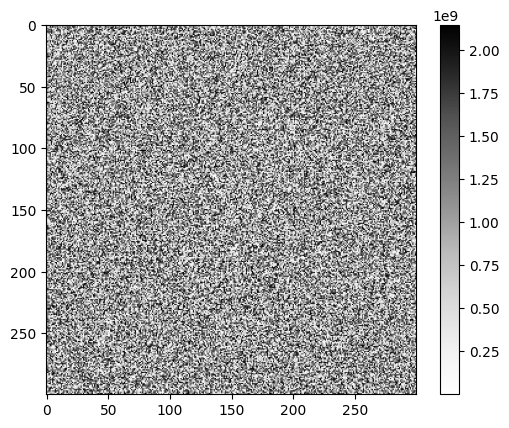

In [235]:
plt.imshow(pixels, cmap='Greys')
plt.colorbar()

# Pseudorandom number generator

In [245]:
import time

def my_random_range(upper: int) -> int:
    '''Returns a random integer between 0 and (upper)'''
    return my_hash(time.time_ns()) % upper

for _ in range(100):
    print(my_random_range(100), end=' ')

55 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 

In [264]:
class Random:
    MAX = 2**31 - 1
    
    def __init__(self, seed=None):
        if seed is None:
            seed = time.time_ns()
        self.seed = seed
        self.current_seed = seed
    
    def randrange(self, upper: int) -> int:
        new_seed_value = my_hash(self.current_seed)
        to_ret = new_seed_value % upper
        self.current_seed = new_seed_value
        return to_ret
    
    def random(self) -> float:
        new_seed_value = my_hash(self.current_seed)
        to_ret = new_seed_value / self.MAX
        self.current_seed = new_seed_value
        return to_ret


In [290]:
rnd = Random()
randoms = [rnd.randrange(1000) for _ in range(1000000)]

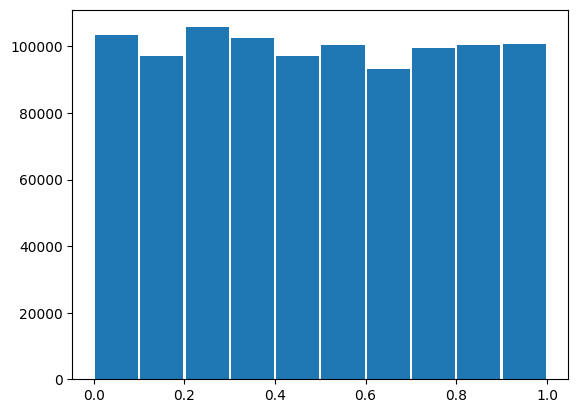

In [291]:
_ = plt.hist(randoms, bins=10, rwidth=0.95)

In [295]:
N = 10000000
ns = 0
for _ in range(N):
    r1 = rnd.random()
    r2 = rnd.random()
    if r1**2 + r2**2 < 1.:
        ns += 1
    

In [296]:
4 * ns/N

3.1455656